In [3]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

# Detect face using OpenCV (Haar Cascades technique)

In [4]:
#add prefix 'r' to avoid error with Unicode
img = cv2.imread(r'D:\Python code\US_President_Classifier\Model\Test data\Barack Obama.jpg')
img.shape

(450, 333, 3)

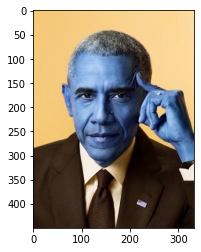

In [5]:
#show image 
plt.imshow(img)

In [6]:
#Removing the third dimension of the image
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(450, 333)

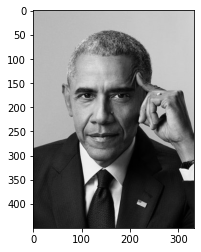

In [7]:
#cmap is colormap: an array of colors used to map pixel data
plt.imshow(gray, cmap='gray')

In [8]:
#Load the required XML classifiers
face_cascade = cv2.CascadeClassifier(r'D:\Python code\US_President_Classifier\Model\opencv\opencv\haarcascades\haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(r'D:\Python code\US_President_Classifier\Model\opencv\opencv\haarcascades\haarcascade_eye.xml')

#Detect the face in the image
#Return an array of the positions of the retangle where face is located
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[ 51, 103, 187, 187]])

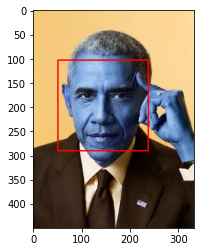

In [9]:
#Draw the rectangle around the face
(x,y,w,h) = faces[0]
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2) #RGB=255, draw red rectangle
plt.imshow(face_img)


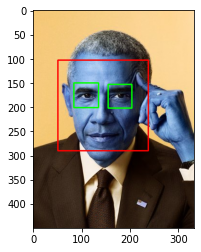

In [10]:
#Detect eyes
cv2.destroyAllWindows()
for (x,y,w,h) in faces: #iterate through all faces
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2) #draw rectangle in face
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray) #find eyes
    for (ex,ey,ew,eh) in eyes: #iterate through all eyes
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2) #draw rectangle in eyes

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

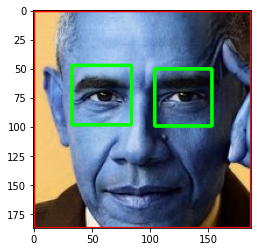

In [11]:
#roi is region of interest. in this case, the face region of every picture
#task: cropping the roi from all pictures 
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [12]:
# Function to input img and return the cropped faces with 2 eyes
def get_cropped_image_if_2_eyes(image_path):
    # load image then reduce the dimensions to 2
    img = cv2.imread(image_path)
    if img is not None:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        # detect face and eyes
        faces = face_cascade.detectMultiScale(gray, 1.3, 5)
        for (x,y,w,h) in faces:
            roi_gray = gray[y:y+h, x:x+w]
            roi_color = img[y:y+h, x:x+w]
            eyes = eye_cascade.detectMultiScale(roi_gray)
            # return the cropped face if there are 2 eyes
            if len(eyes) >= 2:
                return roi_color    

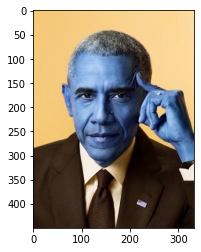

In [13]:
original_image = cv2.imread(r'D:\Python code\US_President_Classifier\Model\Test data\Barack Obama.jpg')
plt.imshow(original_image)

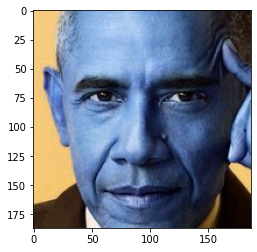

In [14]:
# test function
cropped_image = get_cropped_image_if_2_eyes(r'D:\Python code\US_President_Classifier\Model\Test data\Barack Obama.jpg')
plt.imshow(cropped_image)

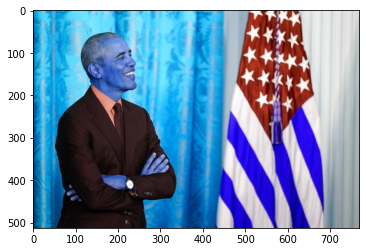

In [15]:
# load obstructed image
original_image_obs = cv2.imread(r'D:\Python code\US_President_Classifier\Model\Test data\Obama returns to White House to celebrate health_yy.jpg')
plt.imshow(original_image_obs)

In [16]:
# test the function with obstructed image 
# -> return nothing
crop_no_2_eyes = get_cropped_image_if_2_eyes(r'D:\Python code\US_President_Classifier\Model\Test data\Obama returns to White House to celebrate health_yy.jpg')
crop_no_2_eyes

# Begin data cleaning

In [17]:
# specify the path of the dataset and the cropped folder
path_to_data = r"D:\Python code\US_President_Classifier\Model\Dataset"
path_to_cr_data = r"D:\Python code\US_President_Classifier\Model\Dataset\Cropped"

In [18]:
# store all the path to the dataset's sub-folders using a list
import os
img_dirs = []
for entry in os.scandir(path_to_data): # goes through all sub_folders
    if  entry.is_dir():
        img_dirs.append(entry.path)

In [65]:
img_dirs

['D:\\Python code\\US_President_Classifier\\Model\\Dataset\\Barack Obama',
 'D:\\Python code\\US_President_Classifier\\Model\\Dataset\\Bill Clinton',
 'D:\\Python code\\US_President_Classifier\\Model\\Dataset\\Cropped',
 'D:\\Python code\\US_President_Classifier\\Model\\Dataset\\Donald Trump',
 'D:\\Python code\\US_President_Classifier\\Model\\Dataset\\George H. W. Bush',
 'D:\\Python code\\US_President_Classifier\\Model\\Dataset\\Joe Biden']

Go through all images in dataset folder and create cropped images for them. There will be cropped folder inside dataset folder after you run this code

In [66]:
# create the cropped folder if it doesn't exist
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data) # if folder exist, remove it (to run multiple time)
os.mkdir(path_to_cr_data) #create new

In [67]:
cropped_image_dirs = [] #cropped pics' folder paths
president_file_names_dict = {}

# iterate through all images directories
for img_dir in img_dirs:
    count = 1
    president_name = img_dir.split('\\')[-1] #get the names
    president_file_names_dict[president_name] = []

    for entry in os.scandir(img_dir): #crop every pics in directory
        roi_color = get_cropped_image_if_2_eyes(entry.path) 
        # if pass, put pic in crop folders for each president
        if roi_color is not None: 
            cropped_folder = os.path.join(path_to_cr_data, president_name)  #use os.path.join to append a subdirectory name
            if not os.path.exists(cropped_folder): #if folder not exist, create new
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ", cropped_folder)

            # generate file name and path for cropped pic
            cropped_file_name = president_name + str(count) + ".png"    #vd: Trump1.png
            cropped_file_path = os.path.join(cropped_folder, cropped_file_name)

            # save cropped pic to file path
            cv2.imwrite(cropped_file_path, roi_color)
            president_file_names_dict[president_name].append(cropped_file_path)
            
            count += 1

Generating cropped images in folder:  D:\Python code\US_President_Classifier\Model\Dataset\Cropped\Barack Obama
Generating cropped images in folder:  D:\Python code\US_President_Classifier\Model\Dataset\Cropped\Bill Clinton
Generating cropped images in folder:  D:\Python code\US_President_Classifier\Model\Dataset\Cropped\Donald Trump
Generating cropped images in folder:  D:\Python code\US_President_Classifier\Model\Dataset\Cropped\George H. W. Bush
Generating cropped images in folder:  D:\Python code\US_President_Classifier\Model\Dataset\Cropped\Joe Biden


After manually examine cropped folder and delete any unwanted images, build the president_file_names_dict

In [68]:
president_file_names_dict = {}
for img_dir in cropped_image_dirs:
    president_name = img_dir.split('\\')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    president_file_names_dict[president_name] = file_list
president_file_names_dict

{'Barack Obama': ['D:\\Python code\\US_President_Classifier\\Model\\Dataset\\Cropped\\Barack Obama\\Barack Obama1.png',
  'D:\\Python code\\US_President_Classifier\\Model\\Dataset\\Cropped\\Barack Obama\\Barack Obama11.png',
  'D:\\Python code\\US_President_Classifier\\Model\\Dataset\\Cropped\\Barack Obama\\Barack Obama12.png',
  'D:\\Python code\\US_President_Classifier\\Model\\Dataset\\Cropped\\Barack Obama\\Barack Obama13.png',
  'D:\\Python code\\US_President_Classifier\\Model\\Dataset\\Cropped\\Barack Obama\\Barack Obama14.png',
  'D:\\Python code\\US_President_Classifier\\Model\\Dataset\\Cropped\\Barack Obama\\Barack Obama15.png',
  'D:\\Python code\\US_President_Classifier\\Model\\Dataset\\Cropped\\Barack Obama\\Barack Obama16.png',
  'D:\\Python code\\US_President_Classifier\\Model\\Dataset\\Cropped\\Barack Obama\\Barack Obama17.png',
  'D:\\Python code\\US_President_Classifier\\Model\\Dataset\\Cropped\\Barack Obama\\Barack Obama18.png',
  'D:\\Python code\\US_President_Classif

# Feature engineering: Apply wavelet transform to extract meaningful features

In [69]:
import numpy as np
import pywt
import cv2

def w2d(img, mode='haar', level=1):
    imArray = img
    # covert datatype
    # convert img to grayscale
    imArray = cv2.cvtColor(imArray,cv2.COLOR_RGB2GRAY)
    # conver to float
    imArray = np.float32(imArray)
    imArray /= 255;
    # compute coefficients
    coeffs = pywt.wavedec2(imArray, mode, level=level)

    # process coefficients
    coeffs_H = list(coeffs)
    coeffs_H[0] *= 0;

    # reconstrucution
    imArray_H =pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H = np.uint8(imArray_H)

    return imArray_H

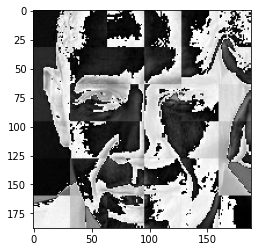

In [70]:
im_har = w2d(cropped_image, 'db1',5)
plt.imshow(im_har, cmap='gray')

# Begin feature extraction for all cropped pictures and prepare x and y for model training

In [71]:
# assign the president names to numbers to put in the Y list
class_dict = {}
count = 0
for president_name in president_file_names_dict.keys():
    class_dict[president_name] = count
    count += 1
class_dict

{'Barack Obama': 0,
 'Bill Clinton': 1,
 'Donald Trump': 2,
 'George H. W. Bush': 3,
 'Joe Biden': 4}

In [72]:
x = []
y = []

# vertically stacking the raw image with the wavelet transformed image
for president_name, training_files in president_file_names_dict.items(): #iterate through each president
    for training_image in training_files: #iterate through each pictures of each president
        img = cv2.imread(training_image)
        scaled_raw_img = cv2.resize(img, (32,32)) #scale raw images to be in the same size
        img_har = w2d(img,'db1',5) #wavelet transform
        scaled_img_har = cv2.resize(img_har, (32,32)) #scale transformed images to be in the same size
        
        # vertically stack these images using numpy.vstack
        combined_img = np.vstack((scaled_raw_img.reshape(32*32*3,1), scaled_img_har.reshape(32*32,1))) #32*32*3 because the raw image has color
        
        # creat a list of X and Y for model training
        x.append(combined_img)
        y.append(class_dict[president_name])

In [73]:
len(x)

176

In [74]:
# turn list into array with float type to avoid error when training
x = np.array(x).reshape(len(x),4096).astype(float)
x[0]

array([179., 182., 201., ..., 246., 248., 245.])

In [75]:
x.shape

(176, 4096)

# Begin model training
Use SVM with rbf kernel tuned with heuristic finetuning

In [76]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [77]:
# split x, y train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0) #same train and test sets across different executions

In [78]:
# create a pipeline to scale the data
pipe = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('svc', SVC(kernel = 'rbf', C=10)) #creating an svm model with random parameters
])

# train model
pipe.fit(x_train, y_train)

# check accuracy
pipe.score(x_test, y_test)

0.6388888888888888

In [79]:
print(classification_report(y_test, pipe.predict(x_test)))

              precision    recall  f1-score   support

           0       0.64      0.88      0.74         8
           1       0.54      0.70      0.61        10
           2       1.00      0.67      0.80         6
           3       0.67      0.33      0.44         6
           4       0.60      0.50      0.55         6

    accuracy                           0.64        36
   macro avg       0.69      0.61      0.63        36
weighted avg       0.67      0.64      0.63        36



Use GridSearch and try different models with different parameters to find the best fine tuned parameters

In [80]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [81]:
# define different candidate models in a dictionary
model_params = {
    'svm': {
       'model': svm.SVC(gamma='auto', probability=True),
       'params': {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
       } 
    },
   'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    } 
}

In [82]:
# run GridSearchCV to find the best model
scores = []
best_estimators = {}
import pandas as pd 

for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model']) # try each model
    clf = GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False) # and with each parameters with 5 cross folds
    clf.fit(x_train, y_train)
    # return best scores and parameters for a model
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_

df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.714286,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.428571,{'randomforestclassifier__n_estimators': 5}
2,logistic_regression,0.742857,{'logisticregression__C': 1}


In [83]:
# the list of models when best tuned
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=5))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [84]:
best_estimators['logistic_regression'].score(x_test,y_test)

0.75

In [85]:
best_estimators['svm'].score(x_test,y_test)

0.7222222222222222

In [86]:
best_estimators['random_forest'].score(x_test,y_test)

0.4166666666666667

In [87]:
best_clf = best_estimators['logistic_regression']

In [88]:
# confusion matrix to see the performance of model
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(x_test))
cm

array([[6, 0, 0, 1, 1],
       [0, 6, 0, 3, 1],
       [0, 1, 5, 0, 0],
       [1, 0, 0, 5, 0],
       [0, 1, 0, 0, 5]], dtype=int64)

Text(69.0, 0.5, 'Truth')

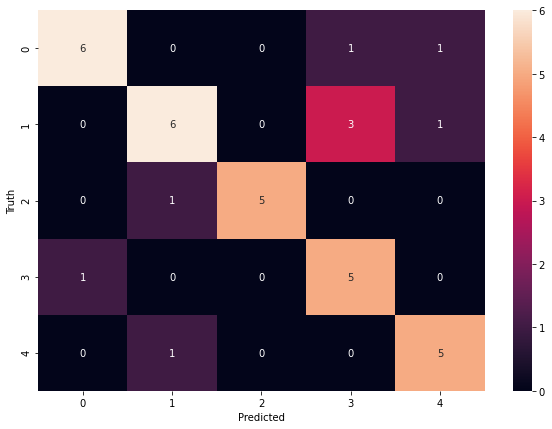

In [89]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

Save the tranined model

In [90]:
%pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, r'D:\Python code\US_President_Classifier\Model\saved_model.pkl')

Note: you may need to restart the kernel to use updated packages.


['D:\\Python code\\US_President_Classifier\\Model\\saved_model.pkl']

Save class dictionary

In [91]:
import json
with open(r"D:\Python code\US_President_Classifier\Model\class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))